# Animations with Celluloid-Camera

Creating interactive or animated charts could be __confusing__ for the __beginers__ .

In this tutorial, we will learn __basics of animations__ and we will make a __animation__ by using celluloid.__Camera__ object instead of matplotlib.animation.__FuncAnimation__ class.

Let's install necessary modules. 

In [1]:
"pip install seaborn"
"pip install celluloid"

'pip install celluloid'

Let's import necessary modules

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from celluloid import Camera 

Before creating __dynamic__ plots let's create __static__ plots to understand the anatomy of dynamic plots.

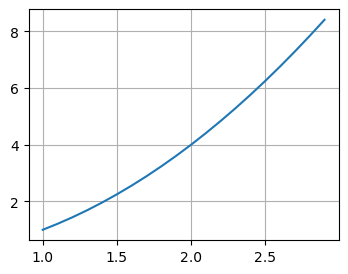

In [3]:
plt.figure(figsize=(4,3))
x_test_data = np.arange(1,3,0.1)
y_test_data = x_test_data ** 2
plt.plot(x_test_data, y_test_data)

plt.grid(True)
plt.show()

We created a '__y__' plot that depend on __x__. Now if we want to __animate__ chart we can;
* __Move__ y-graph through x-y axis
* __Update__ data to new ones

Let's move __function__ graph throuht __y-axis__ .

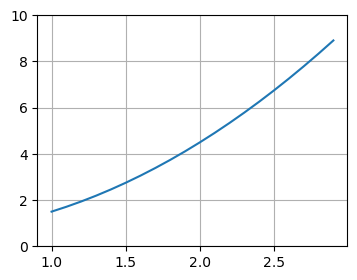

In [4]:
plt.figure(figsize=(4,3))

x_test_data = np.arange(1,3,0.1)

y_test_data = x_test_data ** 2 + 0.5 # Add a value 

plt.plot(x_test_data, y_test_data)

plt.ylim(0,10)
plt.grid(True)
plt.show()

We moved our plot a little __up__ .

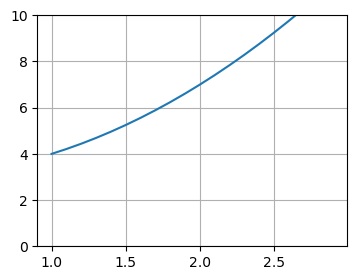

In [5]:
plt.figure(figsize=(4,3))

x_test_data = np.arange(1,3,0.1)

y_test_data = x_test_data ** 2 + 3 # Add a value 

plt.plot(x_test_data, y_test_data)

plt.ylim(0,10)
plt.grid(True)
plt.show()

We moved our plot up more.

This moving method helps to us making our chart animated. 
* If we could take a __capture__ when data __updated__ or __moved__ then we __play sequentialy__ we would get an __animation__. In this situation, celluloid.__Camera__ class can do all of them for us __automaticly__ .

### Preparation to plotting 

In this section we will plot a normal distrubuted data to histogram.

In [6]:
y_data = np.random.normal(size=1000) # Generates a random distrubuted size=1000 data

We will use default __seaborn__ themes

In [7]:
sns.set(style="white")
sns.set_palette("pastel")
sns.set_context("paper")

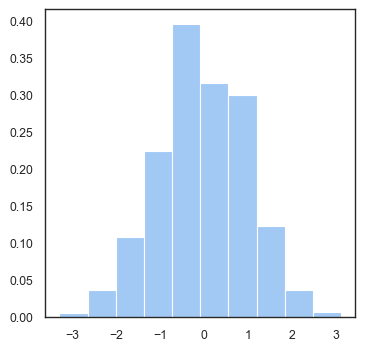

In [8]:
figure = plt.figure(figsize=(4,4)) # Create Figure

y_data = np.random.normal(size=1000) 

plt.hist(y_data,density=True) # Creates histogram density plot

plt.show()

This is our base plot. Let's make our plot more aesthetics.

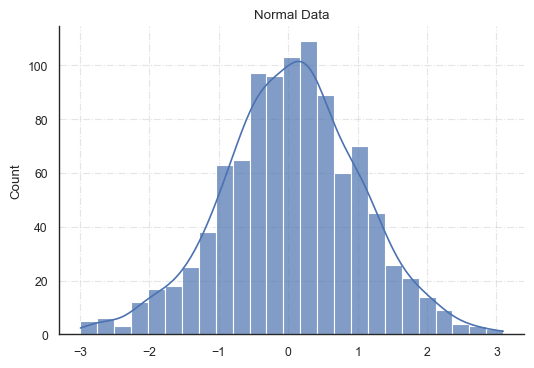

In [9]:
figure = plt.figure(figsize=(6,4))

y_data = np.random.normal(size=1000)

sns.histplot(y_data,
             color="b",
             kde=True, # kde=True Creates normal distrubution line
             alpha=0.7)

plt.grid(True, alpha=0.5, ls="-.") # Makes grid

plt.title("Normal Data")
sns.despine() # Removes spines
plt.show()

### Be acquainted with celluloid.Camera

* Camera object makes it easy to adapt your existing visualization code to create an animation.

* Camera  is helper class for us which could __allow take a snap(capture)__ from __active plot state__ after __merge captures automaticly__ for us. 

We are ready to animate histogram.

## Basics of Animations

Before the begining animate plots, we used to use an __internal (inline)__ window to display our plots. But we need to an __external window__ to display our __dynamic(animated)__ plots.

In [10]:
# changes display options from notebook to external window
%matplotlib qt 

Let's create a mini animation then we'll inspect the code line by line.

In [21]:
fig = plt.figure()

camera = Camera(fig) # Creates camera object

for time in range(100):
    y = np.random.normal(size=1000)
    sns.histplot(y,
                 color="b",
                 kde=True, # Creates normal distrubution line
                 alpha=0.7,
                bins=12)
    camera.snap()
    
anim = camera.animate(interval=100, repeat=True) # Merges captures(snaps)

plt.grid(True,alpha=0.5,ls="-.") # Creates Grid Lines
sns.despine() # Remove spines 
plt.show()


* First we created a figure 
* Then we created a Camera object then we told our camera object to work with our active figure object.
* Then we create a for-loop and told our program to make 100 loop.
* We creted a y-data which a normal distrubuted a 1000 value.
* Plotted histogram plot with seaborn.histplot
* Then we took a capture(snap) with our camere object.
* We repeated these process until loop done.

* Then we told our camera object to merge(animate) all of this captures sequentialy 

What is __interval__ :
* Interval is a parameter which enabling to control speed of playing captures
* Unit of interval is milisecod
* 1000 = 1 second (wait a 'n' second before display next capture)

### Animation 2

Let's make an another example to __clarify more__.

In [12]:
from numpy import pi,sin

Let's create a sine wave with a tracer red-dot animated plot 

In [13]:
x_data = np.linspace(-pi,pi,250)
y_data = sin(x_data) 

In [14]:
sns.set(style="white")
sns.set_palette("pastel")
sns.set_context("paper")

In [22]:
fig = plt.figure()

camera = Camera(fig) # Creates camera object

for index in range(len(x_data)):
    
    plt.plot(x_data,
             y_data,
             color="g")
    
    plt.scatter(x_data[index],
                y_data[index], # Trace function = sin(x) dot by dot
                color="r",
                s=60)
    
    camera.snap()
    
anim = camera.animate(interval=20, # Merges captures(snaps)
                      repeat=True) 

plt.xlim(-pi,pi) # Limits x-scale

plt.title("Sine Wave")

plt.axhline(0,color="k",alpha=0.25,ls="-.") # Makes horizantal static line(baseline)

plt.grid(True,alpha=0.5,ls="-.") # Creates Grid Lines

sns.despine() # Remove spines 

plt.show()